# Pie chart

This chart very useful to show relative frequency of a dataset. Well, it's only usefull for this, nothing more i guess. The caveat it has , If you have too many categories, the angle of pies become so narrow that you can't distinguish them.

> BTW, We have some other type of pie chart called donut chart. It is a donut shaped chart with a total count of all datas. nothing more

In [1]:
# Prerequisites Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(111)

In [2]:
salary = np.random.randint(0,10000+1,500)
gender = np.random.randint(0,2,500)
city= np.random.randint(0,10,500)

df = pd.DataFrame(zip(salary,gender,city),columns=['Salary','Gender','City'])

In [3]:
def gender_map(x):
    if(x==0):
        return 'Female'
    elif(x==1):
        return 'Male'
    else:
        return None
def city_map(x):
    match x:
        case 0:
            return 'Syndey'
        case 1:
            return 'Melborne'
        case 2:
            return 'Tehran'
        case 3:
            return 'Isfahan'
        case 4:
            return 'New york'
        case 5:
            return 'Hawaii'
        case 6:
            return 'Canada'
        case 7:
            return 'Toronto'
        case 8:
            return 'Shanghai'
        case 9:
            return 'Beijing'
        case _:
            return None

In [4]:
df.Gender = df.Gender.map(gender_map)
df.City = df.City.map(city_map)

In [5]:
df.head()

,Salary,Gender,City
0,4820,Male,Beijing
1,4182,Female,Tehran
2,7443,Female,Melborne
3,8873,Male,Isfahan
4,7490,Male,Syndey


In [23]:
# rf stands for Relative Frequency
# df is just, you know, DataFrame
df_rf = pd.DataFrame(df.City.value_counts()/df.size)
df_rf.head()

,count
City,
Shanghai,0.042667
Beijing,0.040000
Syndey,0.034000
Toronto,0.034000
Melborne,0.033333


In [24]:
#See What two brackets would do
df_rf_other_one = pd.DataFrame([df.City.value_counts()/df.size])
df_rf_other_one.head()

City,Shanghai,Beijing,Syndey,Toronto,Melborne,New york,Hawaii,Isfahan,Canada,Tehran
count,0.042667,0.04,0.034,0.034,0.033333,0.032,0.032,0.03,0.028,0.027333


In [25]:
df_rf['City']=df_rf.index
df_rf

,count,City
City,,
Shanghai,0.042667,Shanghai
Beijing,0.040000,Beijing
Syndey,0.034000,Syndey
Toronto,0.034000,Toronto
Melborne,0.033333,Melborne
New york,0.032000,New york
Hawaii,0.032000,Hawaii
Isfahan,0.030000,Isfahan
Canada,0.028000,Canada


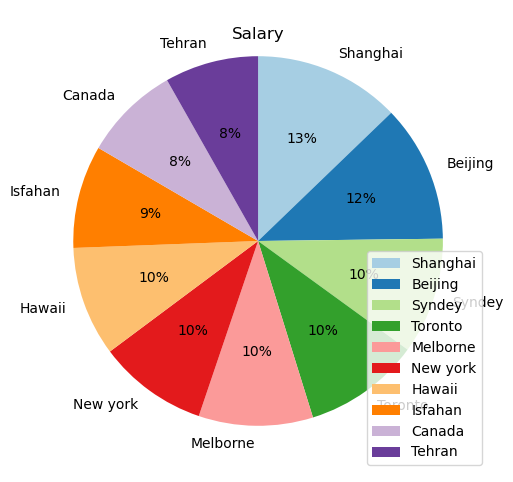

In [75]:
plt.rcParams['figure.figsize']=(6,6)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.pie(df_rf['count'],labels=df_rf.City,autopct='%1.0f%%',counterclock=False,startangle=90,pctdistance=0.6, labeldistance=1.1)
ax.legend(loc='lower right')
plt.title('Salary',y=0.92)
plt.show()

## Donut chart

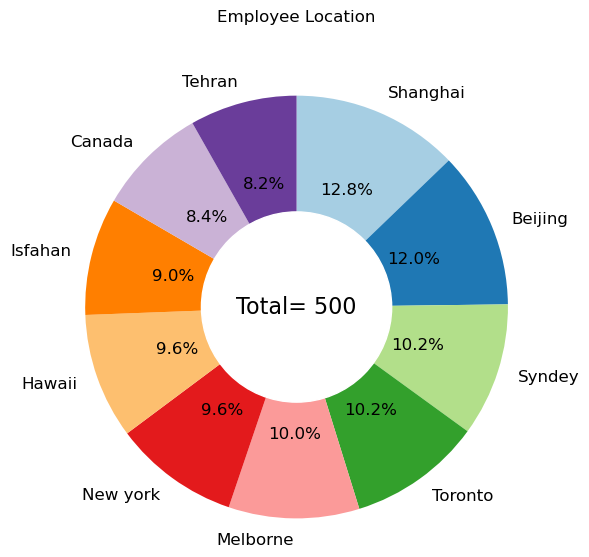

In [74]:
sns.set_palette('Paired')
plt.rcParams['figure.figsize']=(6,6)
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.pie(x=df_rf['count'], labels=df_rf.City,
       autopct='%1.1f%%', counterclock=False, 
       startangle=90, 
       # pctdistance=0.6,
       # labeldistance=1, 
       textprops={'size':'large'})
# Add circle in the middle
plt.gca().add_artist(plt.Circle((0,0), 0.45,color='white'))
# Add string on the donut center
sumstr = 'Total= ' + str(len(df))
ax.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center', size=16)
ax.axis('equal')
plt.title("Employee Location", y=1.1)
plt.show()